# Credit Card Churn Prediction for Thera Bank

## Objective
Thera Bank has recently experienced a significant decline in the number of credit card users. Credit cards are a crucial source of income for the bank, generating various fees like annual fees, balance transfer fees, late payment fees, and others.

The bank wants to:
1. Analyze customer data to identify patterns and reasons for customer churn.
2. Build a classification model to predict customers likely to leave.
3. Provide actionable insights and recommendations to improve customer retention.
## Dataset Description
The dataset contains the following features:

| **Feature**                   | **Description**                                                                                 |
|-------------------------------|-------------------------------------------------------------------------------------------------|
| CLIENTNUM                    | Unique identifier for the customer holding the account.                                        |
| Attrition_Flag               | Internal event variable: "Attrited Customer" if the account is closed, otherwise "Existing Customer". |
| Customer_Age                 | Age of the customer (in years).                                                                |
| Gender                       | Gender of the account holder.                                                                  |
| Dependent_count              | Number of dependents.                                                                          |
| Education_Level              | Educational qualification (e.g., Graduate, High School, College, Post-Graduate, Doctorate).   |
| Marital_Status               | Marital status of the account holder.                                                         |
| Income_Category              | Annual income category of the account holder.                                                 |
| Card_Category                | Type of credit card issued.                                                                   |
| Months_on_book               | Duration of the relationship with the bank (in months).                                        |
| Total_Relationship_Count     | Total number of products held by the customer.                                                |
| Months_Inactive_12_mon       | Number of months the customer was inactive in the last 12 months.                              |
| Contacts_Count_12_mon        | Number of contacts between the customer and the bank in the last 12 months.                   |
| Credit_Limit                 | Credit limit on the credit card.                                                              |
| Total_Revolving_Bal          | Revolving balance carried over from one month to the next.                                    |
| Avg_Open_To_Buy              | Average amount available for purchases over the last 12 months.                               |
| Total_Trans_Amt              | Total transaction amount in the last 12 months.                                               |
| Total_Trans_Ct               | Total transaction count in the last 12 months.                                                |
| Total_Ct_Chng_Q4_Q1          | Ratio of total transaction count in Q4 to Q1.                                                 |
| Total_Amt_Chng_Q4_Q1         | Ratio of total transaction amount in Q4 to Q1.                                                |
| Avg_Utilization_Ratio        | Proportion of available credit used by the customer.                                          |

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library to help with statistical analysis
import scipy.stats as stats
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
import statsmodels.api as sm
# To build model for prediction
from sklearn.linear_model import LogisticRegression
# Import standard scalar
from sklearn.preprocessing import StandardScaler
# import RFE
from sklearn.feature_selection import RFE
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
# Preventing scientific notation.
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='/content/drive/MyDrive/Python Course'

In [5]:
#  store pellete for future use
pellete='Set2'
colors = sns.color_palette(pellete)  # Get Set2 color palette for future use
sns.set(style="darkgrid") # Set grid style

## **Data Overview**

- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data
- Check for missing values
- Check for null values
- Check for the mjority class if any

In [6]:
# load the data in to panda dataframe
churn_df=pd.read_csv(f'{path}/BankChurners.csv')

In [7]:
# Deep copy the dataframe
df=churn_df.copy(deep=True)

In [8]:
# Detail info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Observations:
- All columns except 6(Object type) are numerical columns.
- 9 columns have no null values, 2 columns (Education Level and Maritial Status) have null values.

In [9]:
# shape of dataframe
df.shape

(10127, 21)

### Observations:
The given data set has 10127 rows and 21 columns.

In [10]:
# Show first 5 rows
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [11]:
print(f"No of Duplicated values : {df.duplicated().sum()}")

No of Duplicated values : 0


In [12]:
# Checking the data frame for null values.
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


### Observations:
- Education_Level has 1519 null values.
- Marital_Status has 749 null values.

In [13]:
# Describe object columns
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


### Insights from the Data

1. **Attrition_Flag**:  
   - Out of 10,127 customers, most (8,500) are existing customers, suggesting that the majority have stayed loyal to the company.  
   - Only 1,627 customers have likely left or been flagged for attrition.  

2. **Gender**:  
   - There are slightly more female (5,358) customers compared to male customers.  
   - This could indicate either a higher female customer base or a preference for the services among women.  

3. **Education_Level**:  
   - Data is available for only 8,608 customers. The missing data (~1,519 rows) might need to be addressed through imputation or exclusion in analysis.  
   - Most customers (3,128) are graduates, suggesting that educated individuals dominate the customer base.  

4. **Marital_Status**:  
   - Data is available for 9,378 customers, with some missing values (~749 rows).  
   - Most customers (4,687) are married, indicating that married individuals may be a key segment for this service/product.  

5. **Income_Category**:  
   - "Less than $40K" is the most frequent income category (3,561 customers), making up a significant portion of the customer base.  
   - The company may attract lower- to middle-income groups, which could influence marketing and product strategies.  

6. **Card_Category**:  
   - "Blue" is the most popular card category, with 9,436 customers using it.  
   - Other card categories are less prevalent, suggesting that the company might focus on promoting premium categories to diversify usage.

In [14]:
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


### Insights from Summary Statistics

1. **CLIENTNUM**:
   - The client numbers are unique identifiers with no meaningful statistical insight.

2. **Customer_Age**:
   - The average customer age is approximately 46 years, with a range from 26 to 73 years.  
   - Most customers are between 41 (25th percentile) and 52 (75th percentile), indicating a middle-aged customer base.  

3. **Dependent_count**:
   - Customers have an average of 2.3 dependents, with a maximum of 5.  
   - The majority of customers have between 1 and 3 dependents (25th to 75th percentile).  

4. **Months_on_book**:
   - Customers have been with the company for an average of 36 months (~3 years).  
   - The range spans from 13 to 56 months, suggesting both new and long-term customers.  

5. **Total_Relationship_Count**:
   - On average, customers have 3.8 relationships with the company (e.g., accounts, products).  
   - Most have between 3 and 5 relationships, indicating a moderately engaged customer base.  

6. **Months_Inactive_12_mon**:
   - The average customer was inactive for 2.3 months in the past year.  
   - While most customers were inactive for 2-3 months, some were inactive for up to 6 months.  

7. **Contacts_Count_12_mon**:
   - Customers contacted the company an average of 2.45 times in the past year.  
   - Most customers contacted the company between 2 and 3 times, but a small group contacted up to 6 times.  

8. **Credit_Limit**:
   - The average credit limit is $8,632, with a wide range from $1,438 to $34,516.  
   - Most customers have credit limits between $2,555 (25th percentile) and $11,067 (75th percentile).  

9. **Total_Revolving_Bal**:
   - The average revolving balance is $1,163, with a maximum of $2,517.  
   - Most balances fall between $359 and $1,784, indicating moderate credit usage.  

10. **Avg_Open_To_Buy**:
    - On average, customers have $7,469 available for spending.  
    - The wide range (from $3 to $34,516) suggests varying levels of financial flexibility.  

11. **Total_Amt_Chng_Q4_Q1**:
    - The average change in transaction amount from Q4 to Q1 is 0.76, with a maximum of 3.4.  
    - Most customers experienced a change between 0.63 and 0.86, indicating stable spending patterns.  

12. **Total_Trans_Amt**:
    - The average transaction amount is $4,404, ranging from $510 to $18,484.  
    - Most customers spent between $2,155 (25th percentile) and $4,741 (75th percentile).  

13. **Total_Trans_Ct**:
    - Customers completed an average of 65 transactions, with a range from 10 to 139.  
    - Most customers completed between 45 and 81 transactions, indicating moderate activity.  

14. **Total_Ct_Chng_Q4_Q1**:
    - The average change in transaction count from Q4 to Q1 is 0.71.  
    - Most customers experienced a change between 0.58 and 0.82, showing stable transaction patterns.  

15. **Avg_Utilization_Ratio**:
    - The average credit utilization ratio is 0.27 (27%), with a maximum of 0.99 (99%).  
    - Most customers utilize between 2.3% (25th percentile) and 50.3% (75th percentile), indicating varied usage levels.

In [15]:
# Check the distribution of Attrition flag
df.groupby('Attrition_Flag').agg({'CLIENTNUM': 'count'})

,CLIENTNUM
Attrition_Flag,
Attrited Customer,1627
Existing Customer,8500


Most of customers are existing customers

In [16]:
#Encoding Existing and Attrited customers to 1 and 0 .
df_encod=df.copy(deep=True)
df_encod["Attrition_Flag"] = df_encod["Attrition_Flag"].map({"Existing Customer": 1, "Attrited Customer": 0})

In [17]:
# check if the encoding sucessfull by checking first 5 and last 5
df_encod.join(df,lsuffix='_left',rsuffix='_right',how='inner')[['Attrition_Flag_left','Attrition_Flag_right']].head()

,Attrition_Flag_left,Attrition_Flag_right
0,1,Existing Customer
1,1,Existing Customer
2,1,Existing Customer
3,1,Existing Customer
4,1,Existing Customer


In [18]:
# check if the encoding sucessfull

df_encod.join(df,lsuffix='_left',rsuffix='_right',how='inner')[['Attrition_Flag_left','Attrition_Flag_right']].tail()

,Attrition_Flag_left,Attrition_Flag_right
10122,1,Existing Customer
10123,0,Attrited Customer
10124,0,Attrited Customer
10125,0,Attrited Customer
10126,0,Attrited Customer


In [19]:
# Dropping CLIENTNUM as its not needed
df_encod.drop('CLIENTNUM', axis=1, inplace=True)


In [20]:
# Check value counts for income category
df_encod['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
abc,1112
$120K +,727


It seems there is some random values like abc and around 1112 rows are for that May be it will be ideal if we can put those nan as abc does not make sense

In [21]:
df_encod.select_dtypes(include='object').columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [22]:
df_encod['Education_Level'].value_counts()

,count
Education_Level,
Graduate,3128
High School,2013
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


Most of the customers are graduate some people areun educated .We have below eduxation levels
**Graduate,High School,Uneducated,College,Post-Graduate,Doctorate**

In [23]:
# Check martial status for unique values
df_encod['Marital_Status'].value_counts()

,count
Marital_Status,
Married,4687
Single,3943
Divorced,748


Three unique values like Married,single and Divorced

In [24]:
# print unque values in Card category
df_encod['Card_Category'].value_counts()

,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


There are 4 unique category like blue,silver,gold and platinum of card category.Blue card is having more customers.

#### Remove unwanted Values and Cast all object to  category

In [25]:
# cast to category type
df_encod[df_encod.select_dtypes(include='object').columns] = df_encod[df_encod.select_dtypes(include='object').columns].astype('category')

In [26]:
# check if casting is successful
df_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [27]:
# Replacing "abc" entries in the Income_Category column with np.nan.
df_encod['Income_Category'].replace('abc', np.nan, inplace=True)

In [28]:
# check the value
df_encod['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
$120K +,727


### Utils

In [71]:
def plot_bar_chart_percentage(df, column_name, xlabel, pellete, bar_width=0.6):
    """
    Plots the percentage distribution of a specified categorical column in a DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: The name of the column to analyze.
    - colors: List of colors for the bar plot.
    - figsize: Tuple specifying the figure size.
    - bar_width: Width of the bars in the bar plot.
    """
    # Calculate the percentage of each category in the specified column
    percentages = df[column_name].value_counts(normalize=True)*100
    percentages = percentages.reset_index().rename(columns={ column_name: column_name, 'proportion': 'percent'})
    n=df[column_name].nunique()
    # Increase figure size for better readability
    plt.figure(figsize=(n+1,6))

    # Plot the bar plot with reduced bar width
    ax=sns.barplot(x=column_name, y='percent', data=percentages, palette=pellete,hue=column_name, width=bar_width)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    # Set labels and title
    plt.ylabel('Percentage')
    plt.xlabel(xlabel)
    plt.title(f'Overview of {xlabel}')
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.legend([],[], frameon=False)
    plt.show()


In [30]:
def plot_pie_chart_with_legend(df, column, title=None, colors=None):
    """
    Creates a pie chart with a legend showing the share of each category in a column.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column (str): The column name for which the pie chart will be created.
    - title (str, optional): Title of the pie chart. Default is "Market Segment Proportions".
    - colors (list, optional): List of colors for the pie chart wedges. If not provided, default pastel colors will be used.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Calculate proportions
    proportions = df[column].value_counts(normalize=True)

    # Create the pie chart without annotations
    plt.pie(proportions, labels=None, colors=colors, wedgeprops={'edgecolor': 'white'})

    # Generate legend labels with percentages
    legend_labels = [f'{label}: {percent:.1%}' for label, percent in zip(proportions.index, proportions)]

    # Add the legend
    plt.legend(legend_labels, loc='best', title=column.replace('_', ' ').title())

    # Add title and adjust layout
    plt.title(title)
    plt.tight_layout()

    # Return the plot
    return plt

In [31]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()
    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color='lightcoral')
    hist.set_xlabel(xlabel)
    hist.axvline(mean_value, color='peru', linestyle=':', label='Mean')
    hist.axvline(q25, color='green', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='blue', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='purple', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color='lightcoral')
    box.axvline(mean_value, color='peru', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='green', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='blue', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='purple', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


In [32]:
def draw_count_plot(df, x, xlabel, ylabel, title, hue=None):
    """
    Draws a count plot for a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - title (str): The title for the plot.
    - hue (str, optional): The column name to be used for hue (categorical separation). Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Create the plot
    count=df[x].nunique()
    plt.figure(figsize=(count + 1, 4))
    ax = sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    return plt

In [33]:
def annotate_chart(plot, ax):
    """
    Annotates a chart with the height of each bar.

    Parameters:
    - plot (matplotlib.pyplot): The matplotlib plot object.
    - ax (Axes): The Axes object to annotate.
    """
    for p in ax.patches:
        height = p.get_height()

        # Only annotate if height is significant, and avoid zero or near-zero annotations
        if height > 0.001:
            plot.annotate(f'{format(height, ".1f")}% ',          # Annotate with 1 decimal places
                          (p.get_x() + p.get_width() / 2., height),  # Position the annotation at the top of the bar
                          ha='center', va='center',       # Center the annotation
                          xytext=(0, 4),                  # Small offset to avoid overlapping with the bar
                          textcoords='offset points')


In [34]:
def plot_stacked_bar_with_annotations(df, x, y, normalize='index', figsize=(8, 6), show_legend=True,show_annot=True, ax=None):
    """
    Creates a stacked bar plot with pastel colors and annotates each bar with proportion values.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - y (str): The column name to be used for the y-axis categories.
    - normalize (str, optional): Normalizes the values to proportions. Default is 'index'.
    - figsize (tuple, optional): The size of the figure. Default is (8, 6).
    - show_legend (bool, optional): Whether to show the legend. Default is True.
    - ax (matplotlib.axes.Axes, optional): An existing axes object for plotting. Default is None.

    Returns:
    - ax (matplotlib.axes.Axes): The axes object containing the plot.
    """
    # Create the crosstab
    crosstab = pd.crosstab(df[x], df[y], normalize=normalize) * 100
    crosstab.round(1)
    # Create the plot on the provided ax or create a new one if ax is None
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#66c2a5', '#fc8d62'])

    # Add labels to the axes
    formatted_string = ' '.join(word.capitalize() for word in x.split('_'))
    ax.set_xlabel(formatted_string)
    ax.set_ylabel('Proportion' if normalize else 'Count')
    ax.set_title(f'Proportion of {y} by {x}' if normalize else f'Count of {y} by {x}')

    # Annotate the bars with proportion or count values
    if show_annot:
      for container in ax.containers:
          ax.bar_label(container, label_type='center', fmt='%.1f', labels=[f'{v:.1f}' if v > 0 else '' for v in container.datavalues])


    # Show or remove the legend based on the show_legend parameter
    if not show_legend:
        ax.legend().remove()

    return ax

In [35]:
def create_stacked_bar_subplots(df, columns, y, n_cols=2):
    """
    Creates stacked bar subplots for the specified columns with a common legend.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - columns (list): List of column names to plot on the x-axis.
    - y (str): The column name to plot on the y-axis.
    - n_cols (int, optional): Number of columns for the subplot layout (default is 2).
    """
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

    # Create a figure with adjusted size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through each column and create a subplot for it
    for i, col in enumerate(columns):
        ax = axes[i]  # Get the correct axis
        plot_stacked_bar_with_annotations(df=df, x=col, y=y, ax=ax,show_legend=False)

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Get the handles and labels from one of the plots (to add the common legend)
    handles, labels = axes[0].get_legend_handles_labels()

    # Add a common legend below the subplots
    fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))

    # Adjust layout to avoid overlap
    plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)

    # Show the plot
    plt.show()

In [36]:
def plot_boxplot(df, x_col, y_col, hue_col=None, title=None, xlabel=None, figsize=(8, 5), xticks_rotation=90):
    """
    Creates a box plot to visualize the relationship between variables.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the y-axis.
    - hue_col: str, column name for grouping by color (optional).
    - title: str, title of the plot (optional).
    - xlabel: str, label for the x-axis (optional).
    - figsize: tuple, size of the figure (default is (8, 5)).
    - xticks_rotation: int, rotation angle for x-axis tick labels (default is 90).
      Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """

    plt.figure(figsize=figsize)  # Set the figure size
    bxp = sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col,palette="Set2")  # Create the box plot

    if xlabel:
        bxp.set_xlabel(xlabel)  # Set x-axis label if provided
    if title:
        bxp.axes.set_title(title)  # Set the plot title if provided

    plt.xticks(rotation=xticks_rotation)  # Rotate x-axis labels
    return plt


In [37]:
def draw_box_plot_with_legend(df, x, xlabel, color='red'):
    """
    Draws a box plot with a vertical line indicating the mean value and includes a legend.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    mean_value = df[x].mean()
    sns.boxplot(data=df, x=x, color=color)
    plt.xlabel(xlabel)
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    plt.legend()
    return plt

In [38]:
def plot_box_plot_side_by_side(df, x, xlabel, category_col, color='red'):
    """
    Plots side-by-side box plots for different categories in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - category_col (str): The column name in the DataFrame used to categorize the data.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Extract unique categories
    categories = df[category_col].unique()

    # Create subplots with 1 row and the number of columns equal to the number of categories
    fig, axes = plt.subplots(1, len(categories), figsize=(12, 6))

    # Loop over each category and plot
    for i, category in enumerate(categories):
        plt.sca(axes[i])  # Set the current axes
        subset = df[df[category_col] == category]
        draw_box_plot_with_legend(subset, x, xlabel, color=color)
        axes[i].set_title(f'{category.capitalize()}')

    plt.tight_layout()
    return plt

In [39]:
def create_catplot_with_annotations(df, x, hue, col, colors, height=4, aspect=1, title="Catplot with Annotations", annotation_color='b'):
    """
    Creates a catplot with count kind, a color palette, axis labels, title, and annotations.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis.
    hue (str): The name of the column for hue.
    col (str): The name of the column for creating subplots.
    colors (tuple): A tuple of two colors for the palette.
    height (int): The height of each facet (default is 4).
    aspect (float): Aspect ratio of each facet (default is 1).
    title (str): The title of the plot (default is "Catplot with Annotations").
    annotation_color (str): The color of the annotations (default is 'b').
    """
    # Create the catplot
    catplot = sns.catplot(data=df, x=x, hue=hue, col=col, kind='count', height=height, aspect=aspect, palette=colors)

    # Set axis labels and title
    catplot.set_axis_labels(x, 'Count')
    catplot.set_titles(col_template="{col_name}")
    catplot.fig.suptitle(title, y=1.02)  # Title with a bit of padding

    # Add annotations with specified color
    for ax in catplot.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                        color=annotation_color)

In [40]:
def distribution_plot_wrt_target(data, predictor, target, xlabel1, xlabel2):
    """
    Plots the distribution of a predictor variable with respect to a target variable.

    This function creates a 2x2 grid of plots, including:
    1. Histograms with KDE for each unique value of the target variable.
    2. A boxplot showing the distribution of the predictor variable grouped by the target variable.
    3. A boxplot showing the distribution of the predictor variable grouped by the target variable without outliers.

    Parameters:
    - data (DataFrame): The input DataFrame containing the data.
    - predictor (str): The name of the predictor variable (column) to visualize.
    - target (str): The name of the target variable (column) to group the data by.
    - xlabel1 (str): Label for the x-axis of the first histogram.
    - xlabel2 (str): Label for the x-axis of the second histogram.

    Returns:
    - None: Displays the plots but does not return any values.
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    # Histogram for the first unique target value
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color=colors[0],
        stat="density",
    )
    axs[0, 0].set_xlabel(xlabel1)

    # Histogram for the second unique target value
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color=colors[1],
        stat="density",
    )
    axs[0, 1].set_xlabel(xlabel2)

    # Boxplot with outliers
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], color=colors[0])

    # Boxplot without outliers
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        color=colors[1],
        showmeans=True
    )

    plt.tight_layout()
    plt.show()


In [41]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_sklearn(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [42]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_sklearn(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    y_pred = np.round(pred_temp)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [43]:
def split_train_test(data, target_column, test_size=0.3, random_state=1, add_constant=False, drop_first=True):
    """
    Splits the dataset into training and test sets, with an option to add a constant and create dummy variables.

    Parameters:
    - data (DataFrame): The full DataFrame containing the features and target.
    - target_column (str): The name of the target column to predict.
    - test_size (float, optional): The proportion of the data to include in the test split. Default is 0.3.
    - random_state (int, optional): Controls the shuffling applied to the data before splitting. Default is 1.
    - add_constant (bool, optional): If True, adds a constant (intercept) to the feature set. Default is False.
    - drop_first (bool, optional): If True, drop the first category in the dummy variable encoding to avoid multicollinearity. Default is True.

    Returns:
    - X_train (DataFrame): Training features.
    - X_test (DataFrame): Test features.
    - y_train (Series): Training target.
    - y_test (Series): Test target.
    """
    # Separate target and features
    X = data.drop([target_column], axis=1)
    Y = data[target_column]

    # Add constant if specified
    if add_constant:
        X = sm.add_constant(X)

    # Create dummy variables
    X = pd.get_dummies(X, drop_first=drop_first)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [44]:
def print_dataset_shapes_and_class_distribution(X_train, X_test, y_train, y_test):
    """
    Print the shapes of training and test datasets, along with the percentage of classes in each set.

    Parameters:
    X_train (DataFrame): Training feature set.
    X_test (DataFrame): Test feature set.
    y_train (Series): Training target set.
    y_test (Series): Test target set.
    """
    # Shape of Test and Train Data
    print("Shape of Training set:", X_train.shape)
    print("Shape of Test set:", X_test.shape)

    # Percentage of classes in training set
    print("\nPercentage of classes in Training set:")
    print(y_train.value_counts(normalize=True))

    # Percentage of classes in test set
    print("\nPercentage of classes in Test set:")
    print(y_test.value_counts(normalize=True))

In [45]:
def compare_model_performance(train_performance, test_performance, model_names, mode='both'):
    """
    Combines and compares training and test performance metrics for models.

    Parameters:
    - train_performance (list of DataFrames): A list of DataFrames containing training performance metrics.
    - test_performance (list of DataFrames): A list of DataFrames containing test performance metrics.
    - model_names (list of str): List of model names or descriptions for labeling columns.
    - mode (str): Mode of comparison, either 'both' (default), 'train', or 'test'.

    Returns:
    - pd.DataFrame: A DataFrame combining the performance metrics for comparison.
    """

    # Concatenate training and test performance DataFrames
    if mode == 'both':
        train_df = pd.concat(train_performance, axis=1)
        test_df = pd.concat(test_performance, axis=1)

        # Add model names as column labels
        train_df.columns = [f"{name} (Train)" for name in model_names]
        test_df.columns = [f"{name} (Test)" for name in model_names]

        # Combine train and test into one DataFrame
        combined_df = pd.concat([train_df, test_df], keys=['Train', 'Test'], axis=1)
    elif mode == 'train':
        combined_df = pd.concat(train_performance, axis=1)
        combined_df.columns = model_names
    elif mode == 'test':
        combined_df = pd.concat(test_performance, axis=1)
        combined_df.columns = model_names

    return combined_df

### Exploratory Data Analysis (EDA)

In [49]:
# Printing no of values in each of these catgorical variable
catgoricalcol = [col for col in df_encod.columns if df_encod[col].dtype == 'category']
for col in catgoricalcol:
  print(f'No of values in each {col}:')
  print(df_encod[col].value_counts(normalize=True)*100)

No of values in each Gender:
Gender
F   52.908
M   47.092
Name: proportion, dtype: float64
No of values in each Education_Level:
Education_Level
Graduate        36.338
High School     23.385
Uneducated      17.275
College         11.768
Post-Graduate    5.994
Doctorate        5.239
Name: proportion, dtype: float64
No of values in each Marital_Status:
Marital_Status
Married    49.979
Single     42.045
Divorced    7.976
Name: proportion, dtype: float64
No of values in each Income_Category:
Income_Category
Less than $40K   39.501
$40K - $60K      19.856
$80K - $120K     17.027
$60K - $80K      15.552
$120K +           8.064
Name: proportion, dtype: float64
No of values in each Card_Category:
Card_Category
Blue       93.177
Silver      5.480
Gold        1.145
Platinum    0.197
Name: proportion, dtype: float64


In [50]:
df_encod.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

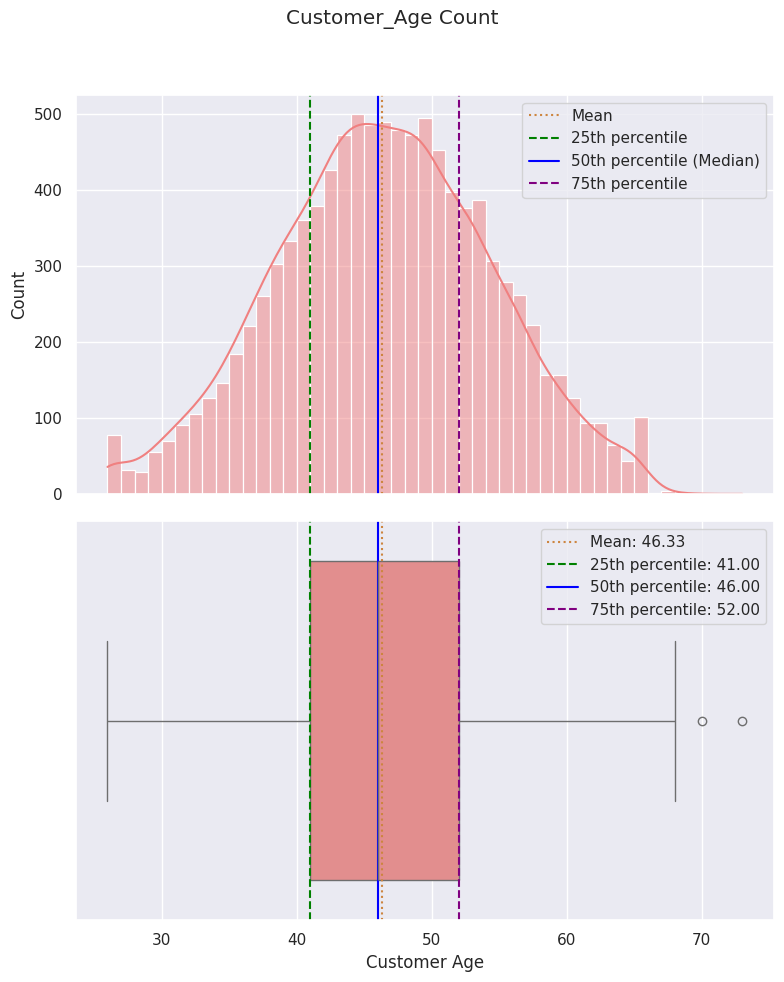

In [52]:
# Distribution  of customer age
plot_histogram_and_boxplot(df_encod,'Customer_Age',xlabel='Customer Age',ylabel='Count',title='Customer_Age Distribution');

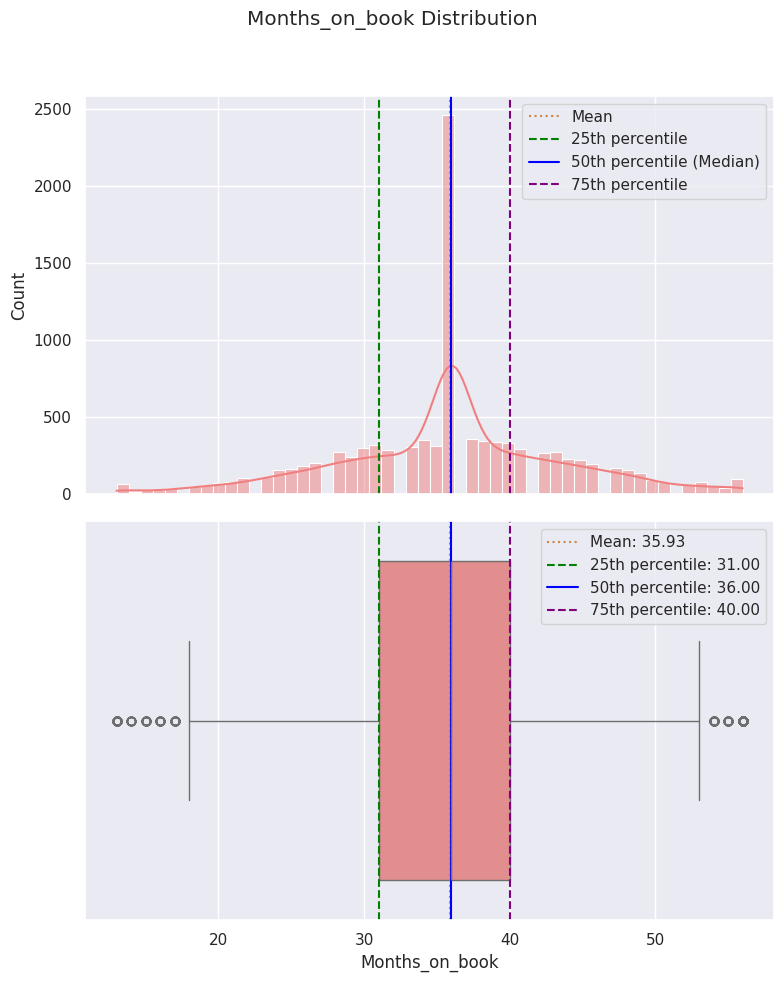

In [61]:
plot_histogram_and_boxplot(df_encod,'Months_on_book',xlabel='Months_on_book',ylabel='Count',title='Months_on_book Distribution');

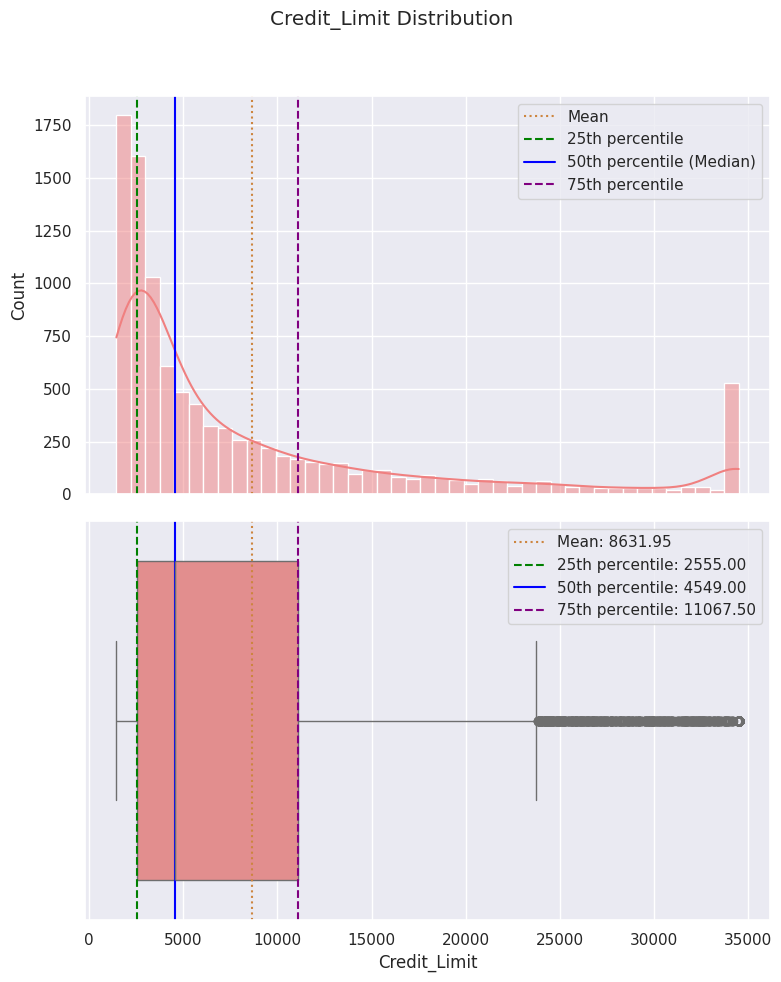

In [62]:
plot_histogram_and_boxplot(df_encod,'Credit_Limit',xlabel='Credit_Limit',ylabel='Count',title='Credit_Limit Distribution');

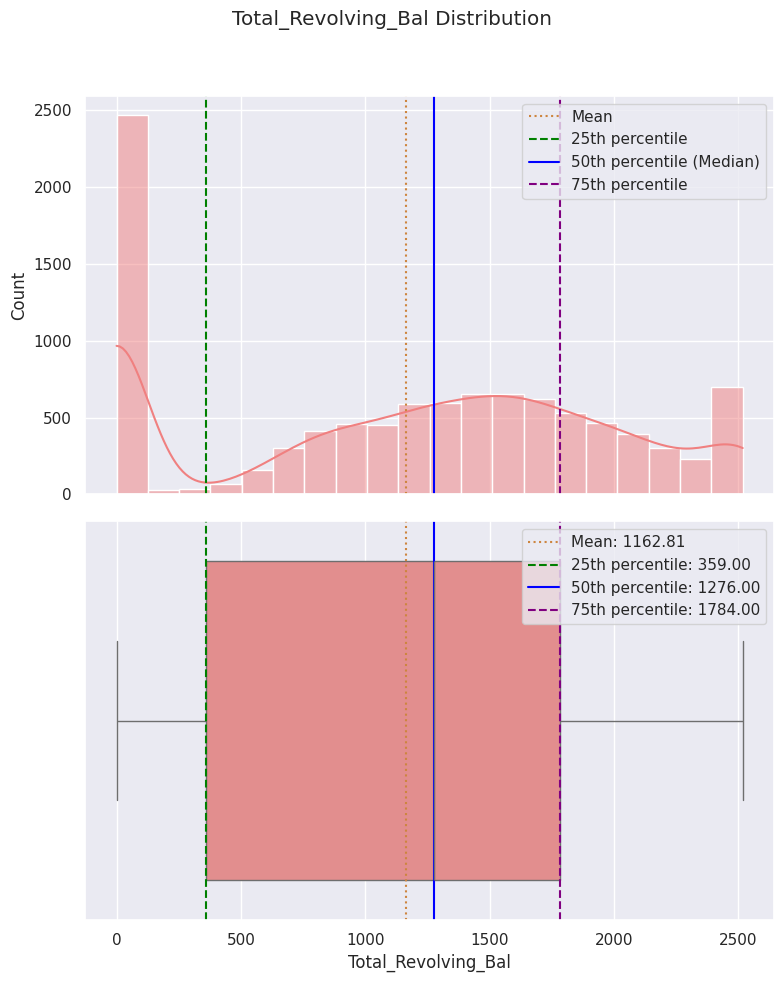

In [63]:
plot_histogram_and_boxplot(df_encod,'Total_Revolving_Bal',xlabel='Total_Revolving_Bal',ylabel='Count',title='Total_Revolving_Bal Distribution');

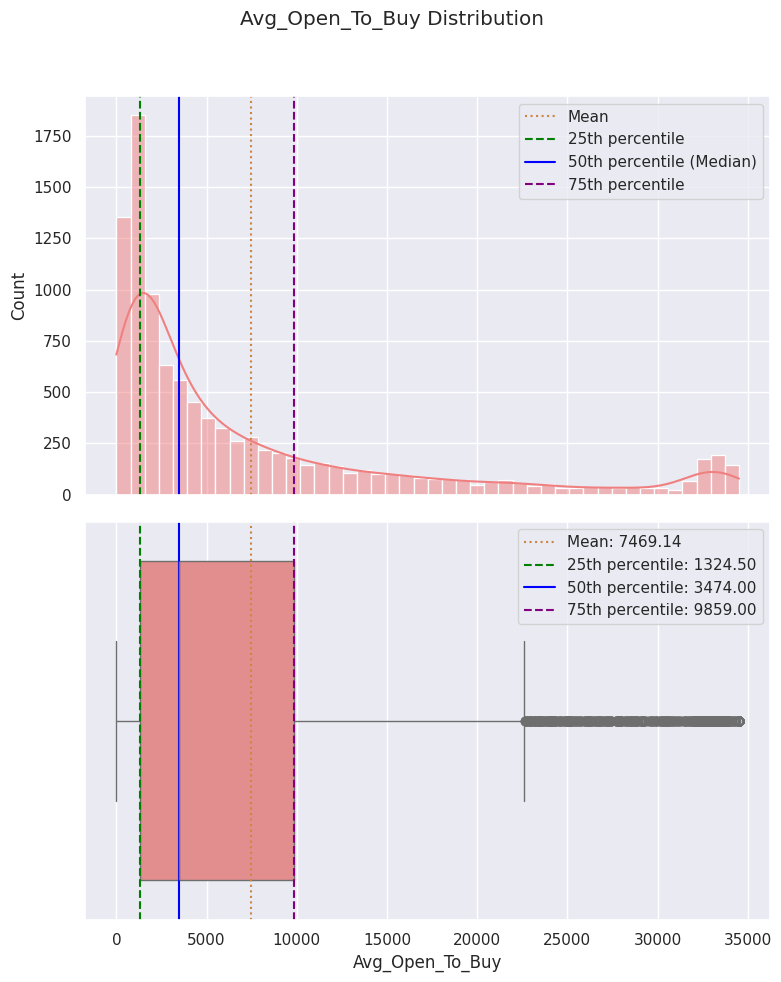

In [64]:
plot_histogram_and_boxplot(df_encod,'Avg_Open_To_Buy',xlabel='Avg_Open_To_Buy',ylabel='Count',title='Avg_Open_To_Buy Distribution');

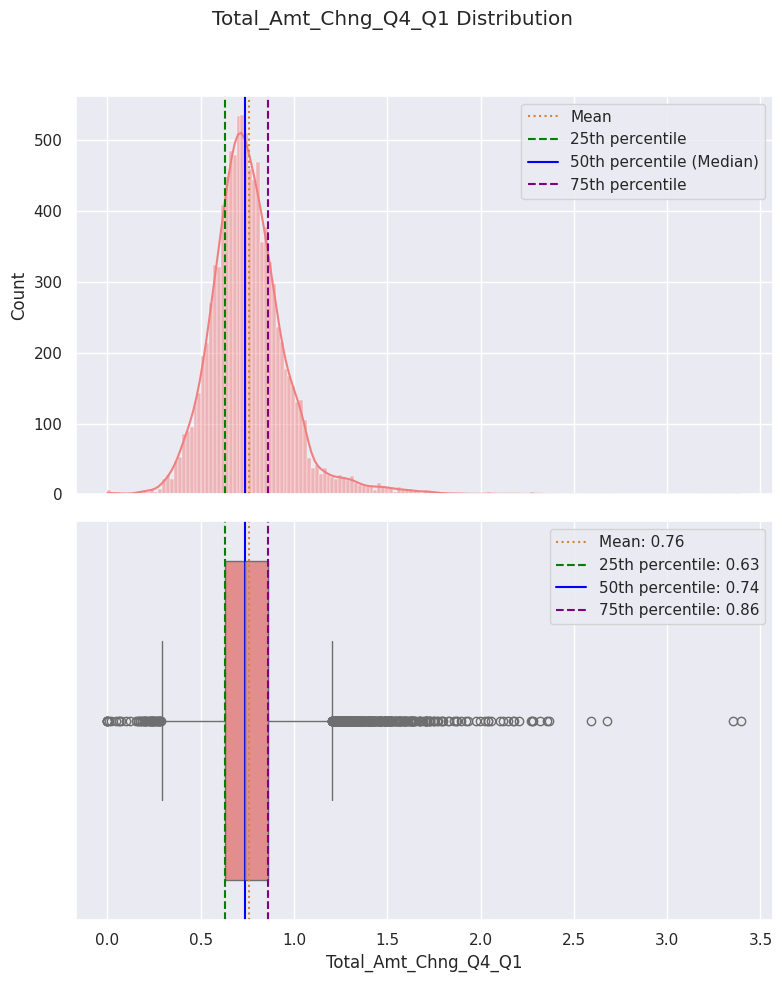

In [65]:
plot_histogram_and_boxplot(df_encod,'Total_Amt_Chng_Q4_Q1',xlabel='Total_Amt_Chng_Q4_Q1',ylabel='Count',title='Total_Amt_Chng_Q4_Q1 Distribution');

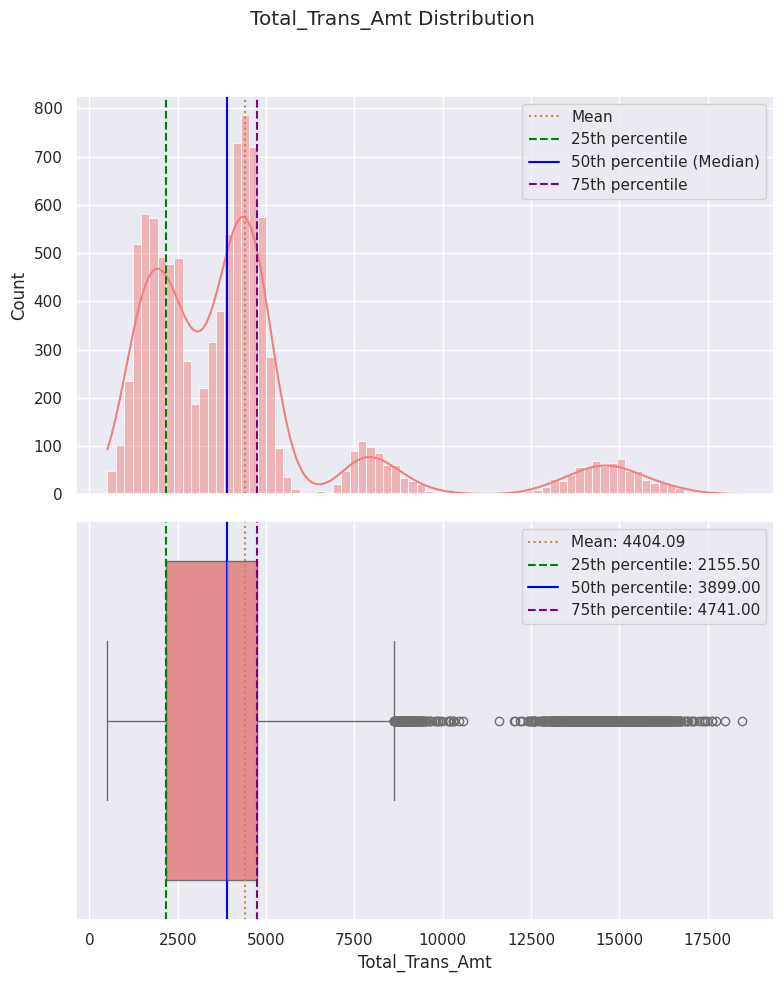

In [66]:
plot_histogram_and_boxplot(df_encod,'Total_Trans_Amt',xlabel='Total_Trans_Amt',ylabel='Count',title='Total_Trans_Amt Distribution');

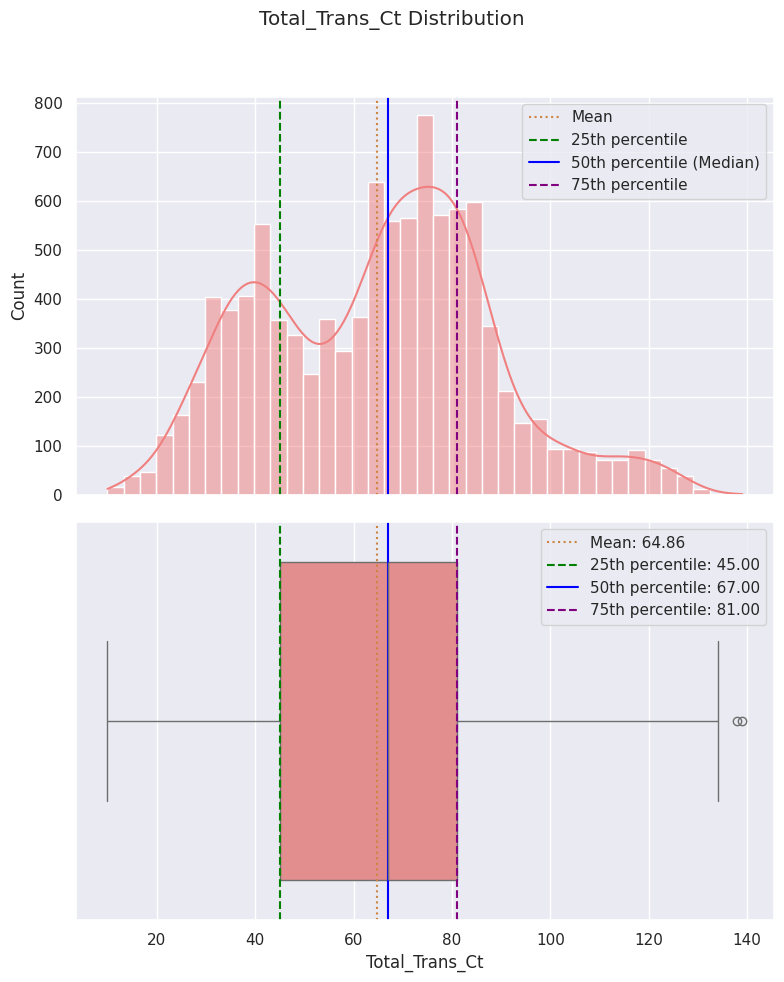

In [67]:
plot_histogram_and_boxplot(df_encod,'Total_Trans_Ct',xlabel='Total_Trans_Ct',ylabel='Count',title='Total_Trans_Ct Distribution');

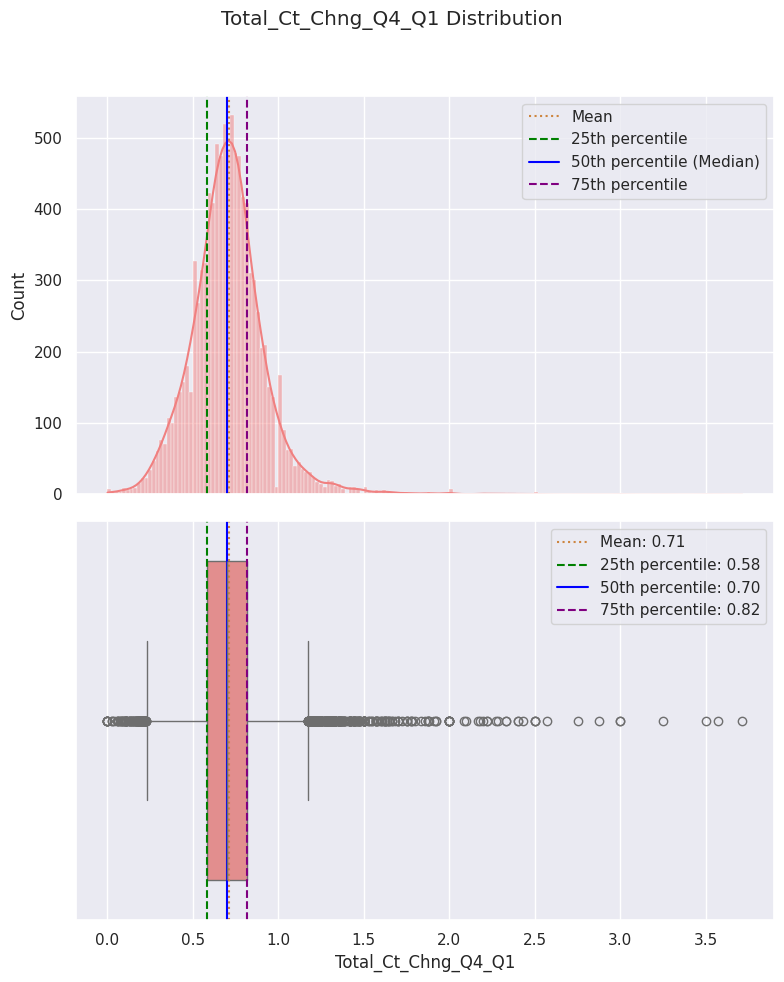

In [68]:
plot_histogram_and_boxplot(df_encod,'Total_Ct_Chng_Q4_Q1',xlabel='Total_Ct_Chng_Q4_Q1',ylabel='Count',title='Total_Ct_Chng_Q4_Q1 Distribution');

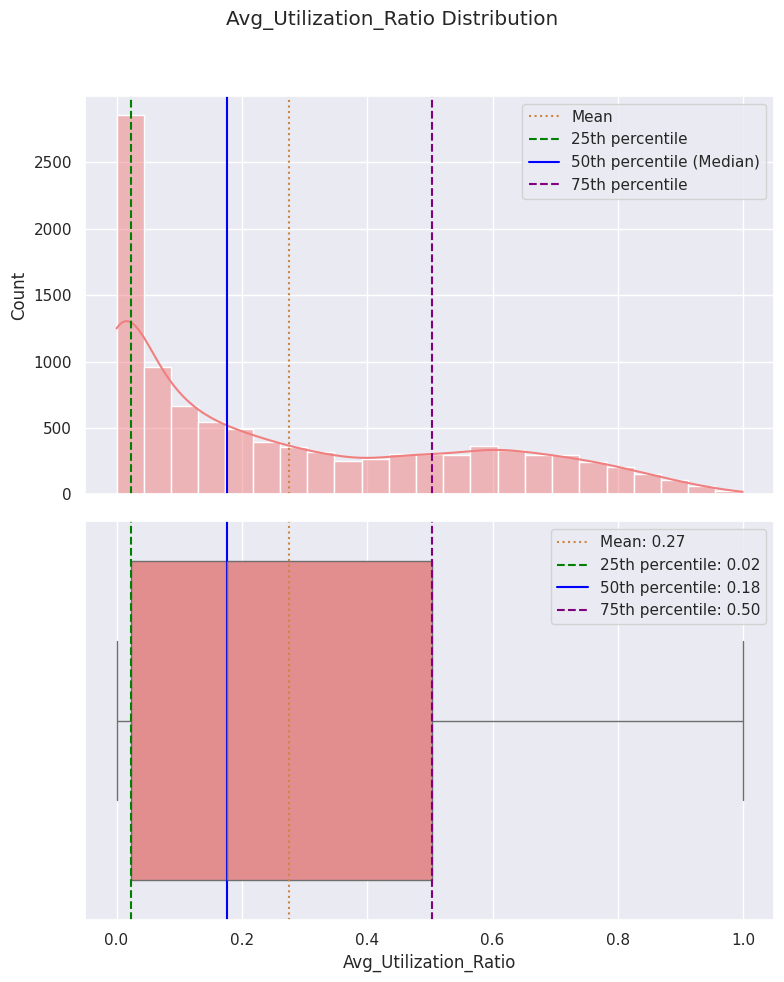

In [69]:
plot_histogram_and_boxplot(df_encod,'Avg_Utilization_Ratio',xlabel='Avg_Utilization_Ratio',ylabel='Count',title='Avg_Utilization_Ratio Distribution');

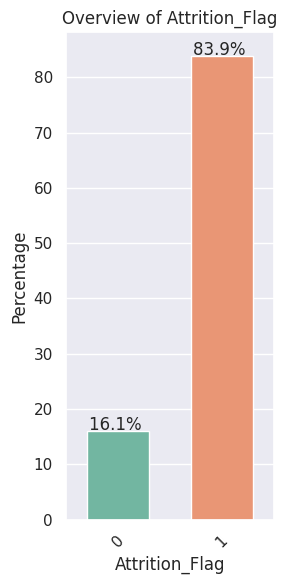

In [72]:
plot_bar_chart_percentage(df_encod,'Attrition_Flag','Attrition_Flag',pellete=pellete)

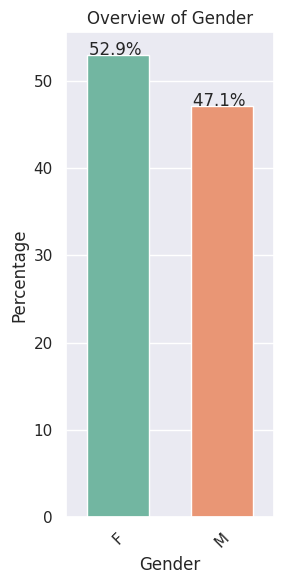

In [73]:
plot_bar_chart_percentage(df_encod,'Gender','Gender',pellete=pellete)

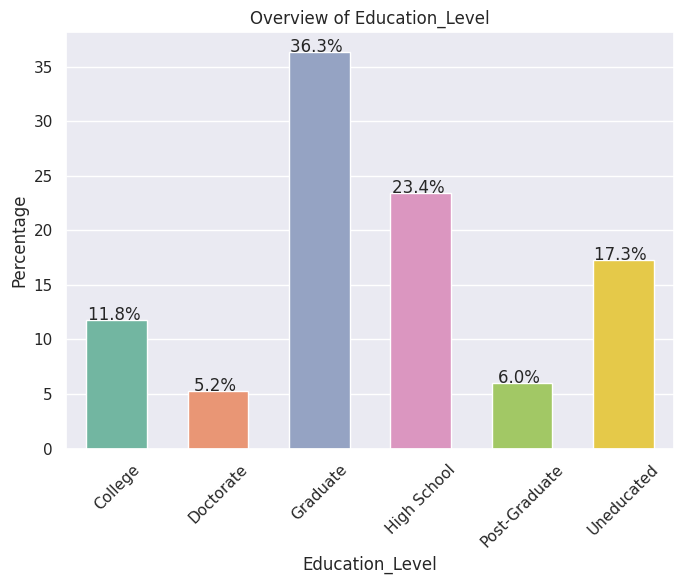

In [74]:
plot_bar_chart_percentage(df_encod,column_name='Education_Level',xlabel='Education_Level',pellete=pellete)

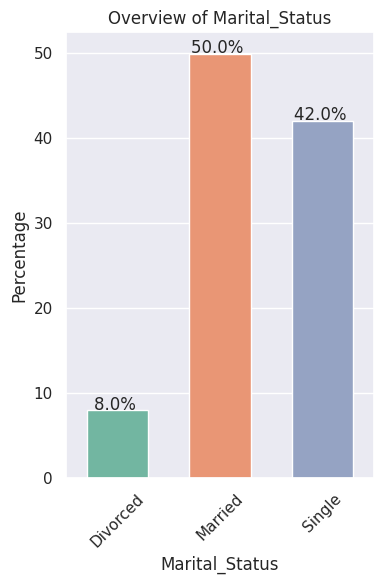

In [75]:
plot_bar_chart_percentage(df_encod,'Marital_Status','Marital_Status',pellete=pellete)

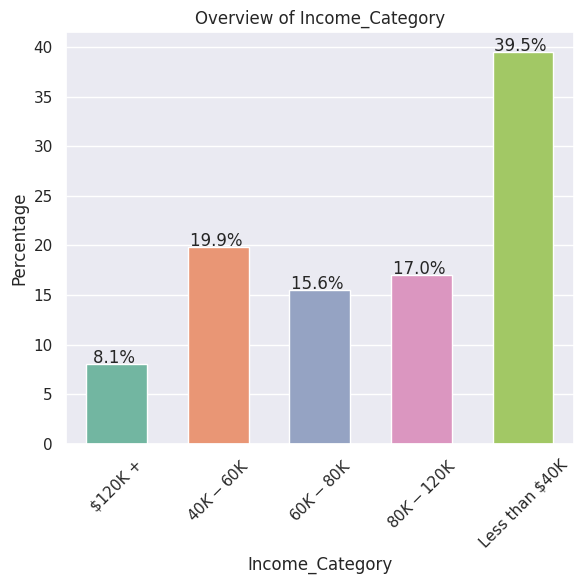

In [76]:
plot_bar_chart_percentage(df_encod,'Income_Category','Income_Category',pellete=pellete)

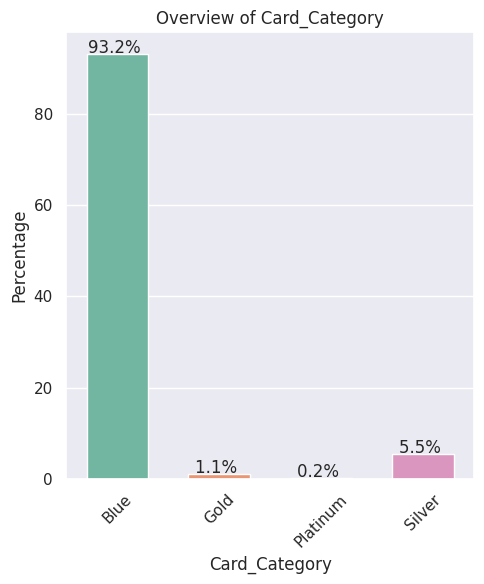

In [77]:
plot_bar_chart_percentage(df_encod,'Card_Category','Card_Category',pellete=pellete)

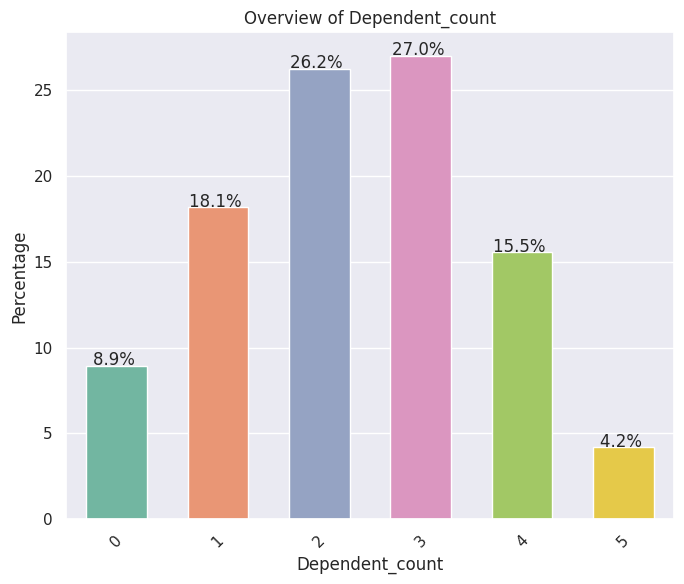

In [78]:
plot_bar_chart_percentage(df_encod,'Dependent_count','Dependent_count',pellete=pellete)